In [1]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [12]:
(X_train, y_train), (X_test, y_test)  = keras.datasets.mnist.load_data()

In [13]:
X_train= X_train / 255
X_test = X_test / 255

In [14]:
"Create sequiential neural network with only one layer that's a Dense layer, with activation function 'Sigmoid'"

"Create sequiential neural network with only one layer that's a Dense layer, with activation function 'Sigmoid'"

In [15]:
tb_callbacks = keras.callbacks.TensorBoard(log_dir=f"logs\\{datetime.now().strftime('%Y%m%d-%H%M%S')}", histogram_freq=1)

In [22]:
model = keras.Sequential(
    [keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
    ]
)

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=7, callbacks=[tb_callbacks])

Epoch 1/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2632 - accuracy: 0.9247

In [23]:
model.evaluate(X_test, y_test, callbacks=[tb_callbacks])

313/313 [==============================] - 4s 648us/step - loss: 0.0824 - accuracy: 0.9763


[0.082375667989254, 0.9763000011444092]

Heatmap

<AxesSubplot:>

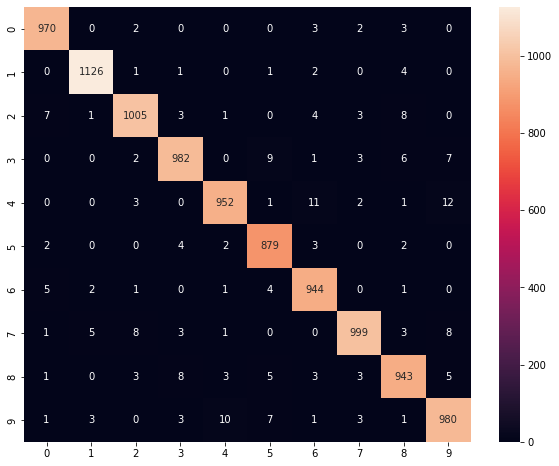

In [8]:
import seaborn as sn

y_predicted = model.predict(X_test)
y_p_labels = [np.argmax(i) for i in y_predicted]
cn = tf.math.confusion_matrix(labels=y_test, predictions=y_p_labels)

plt.figure(figsize = (10, 8))
sn.heatmap(cn, annot=True, fmt="d")

In [9]:
%load_ext tensorboard
%tensorboard --logdir logs